# Particle in a Box: Quantum Mechanics of Confined Systems

## Introduction

The **particle in a box** (also known as the infinite square well) is one of the most fundamental problems in quantum mechanics. It describes a particle confined to move freely within a one-dimensional box with impenetrable walls. Despite its simplicity, this model provides crucial insights into quantum phenomena such as energy quantization, wave functions, and probability distributions.

## Theoretical Foundation

### The Schrödinger Equation

For a particle of mass $m$ in a one-dimensional potential $V(x)$, the time-independent Schrödinger equation is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$

### Boundary Conditions

For the infinite square well of width $L$, the potential is defined as:

$$V(x) = \begin{cases} 0 & \text{if } 0 \leq x \leq L \\ \infty & \text{otherwise} \end{cases}$$

The wave function must satisfy the boundary conditions:
- $\psi(0) = 0$
- $\psi(L) = 0$

### Solutions

Inside the box where $V(x) = 0$, the Schrödinger equation becomes:

$$\frac{d^2\psi(x)}{dx^2} = -\frac{2mE}{\hbar^2}\psi(x) = -k^2\psi(x)$$

where $k = \sqrt{2mE}/\hbar$.

### Quantized Energy Levels

Applying the boundary conditions yields the quantized energy eigenvalues:

$$E_n = \frac{n^2\pi^2\hbar^2}{2mL^2} = \frac{n^2 h^2}{8mL^2}$$

where $n = 1, 2, 3, ...$ is the quantum number.

### Normalized Wave Functions

The normalized eigenfunctions are:

$$\psi_n(x) = \sqrt{\frac{2}{L}}\sin\left(\frac{n\pi x}{L}\right)$$

### Probability Density

The probability density for finding the particle at position $x$ is:

$$|\psi_n(x)|^2 = \frac{2}{L}\sin^2\left(\frac{n\pi x}{L}\right)$$

## Key Physical Insights

1. **Energy Quantization**: The particle can only have discrete energy values proportional to $n^2$
2. **Zero-Point Energy**: The ground state ($n=1$) has non-zero energy $E_1 = \frac{\pi^2\hbar^2}{2mL^2}$
3. **Nodes**: The $n$-th state has $(n-1)$ nodes (zeros) inside the box
4. **Orthonormality**: $\int_0^L \psi_m^*(x)\psi_n(x)dx = \delta_{mn}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Physical constants
hbar = constants.hbar  # Reduced Planck constant (J·s)
m_e = constants.m_e    # Electron mass (kg)

# Box parameters
L = 1e-9  # Box width: 1 nanometer

# Spatial grid
x = np.linspace(0, L, 1000)

def wave_function(x, n, L):
    """
    Calculate the normalized wave function for quantum state n.
    
    Parameters:
    -----------
    x : array-like
        Position coordinates
    n : int
        Quantum number (n = 1, 2, 3, ...)
    L : float
        Box width
    
    Returns:
    --------
    psi : array-like
        Wave function values
    """
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L)

def energy_level(n, L, m=m_e):
    """
    Calculate the energy eigenvalue for quantum state n.
    
    Parameters:
    -----------
    n : int
        Quantum number
    L : float
        Box width
    m : float
        Particle mass (default: electron mass)
    
    Returns:
    --------
    E : float
        Energy in Joules
    """
    return (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

def probability_density(x, n, L):
    """
    Calculate the probability density |ψ|².
    
    Parameters:
    -----------
    x : array-like
        Position coordinates
    n : int
        Quantum number
    L : float
        Box width
    
    Returns:
    --------
    prob : array-like
        Probability density values
    """
    psi = wave_function(x, n, L)
    return np.abs(psi)**2

# Calculate wave functions and energies for first 5 states
n_states = 5
energies_eV = [energy_level(n, L) / constants.eV for n in range(1, n_states + 1)]

print("Energy Levels for Electron in 1 nm Box:")
print("=" * 40)
for n in range(1, n_states + 1):
    E_eV = energy_level(n, L) / constants.eV
    print(f"n = {n}: E_{n} = {E_eV:.3f} eV")

Energy Levels for Electron in 1 nm Box:
n = 1: E_1 = 0.376 eV
n = 2: E_2 = 1.504 eV
n = 3: E_3 = 3.384 eV
n = 4: E_4 = 6.016 eV
n = 5: E_5 = 9.401 eV


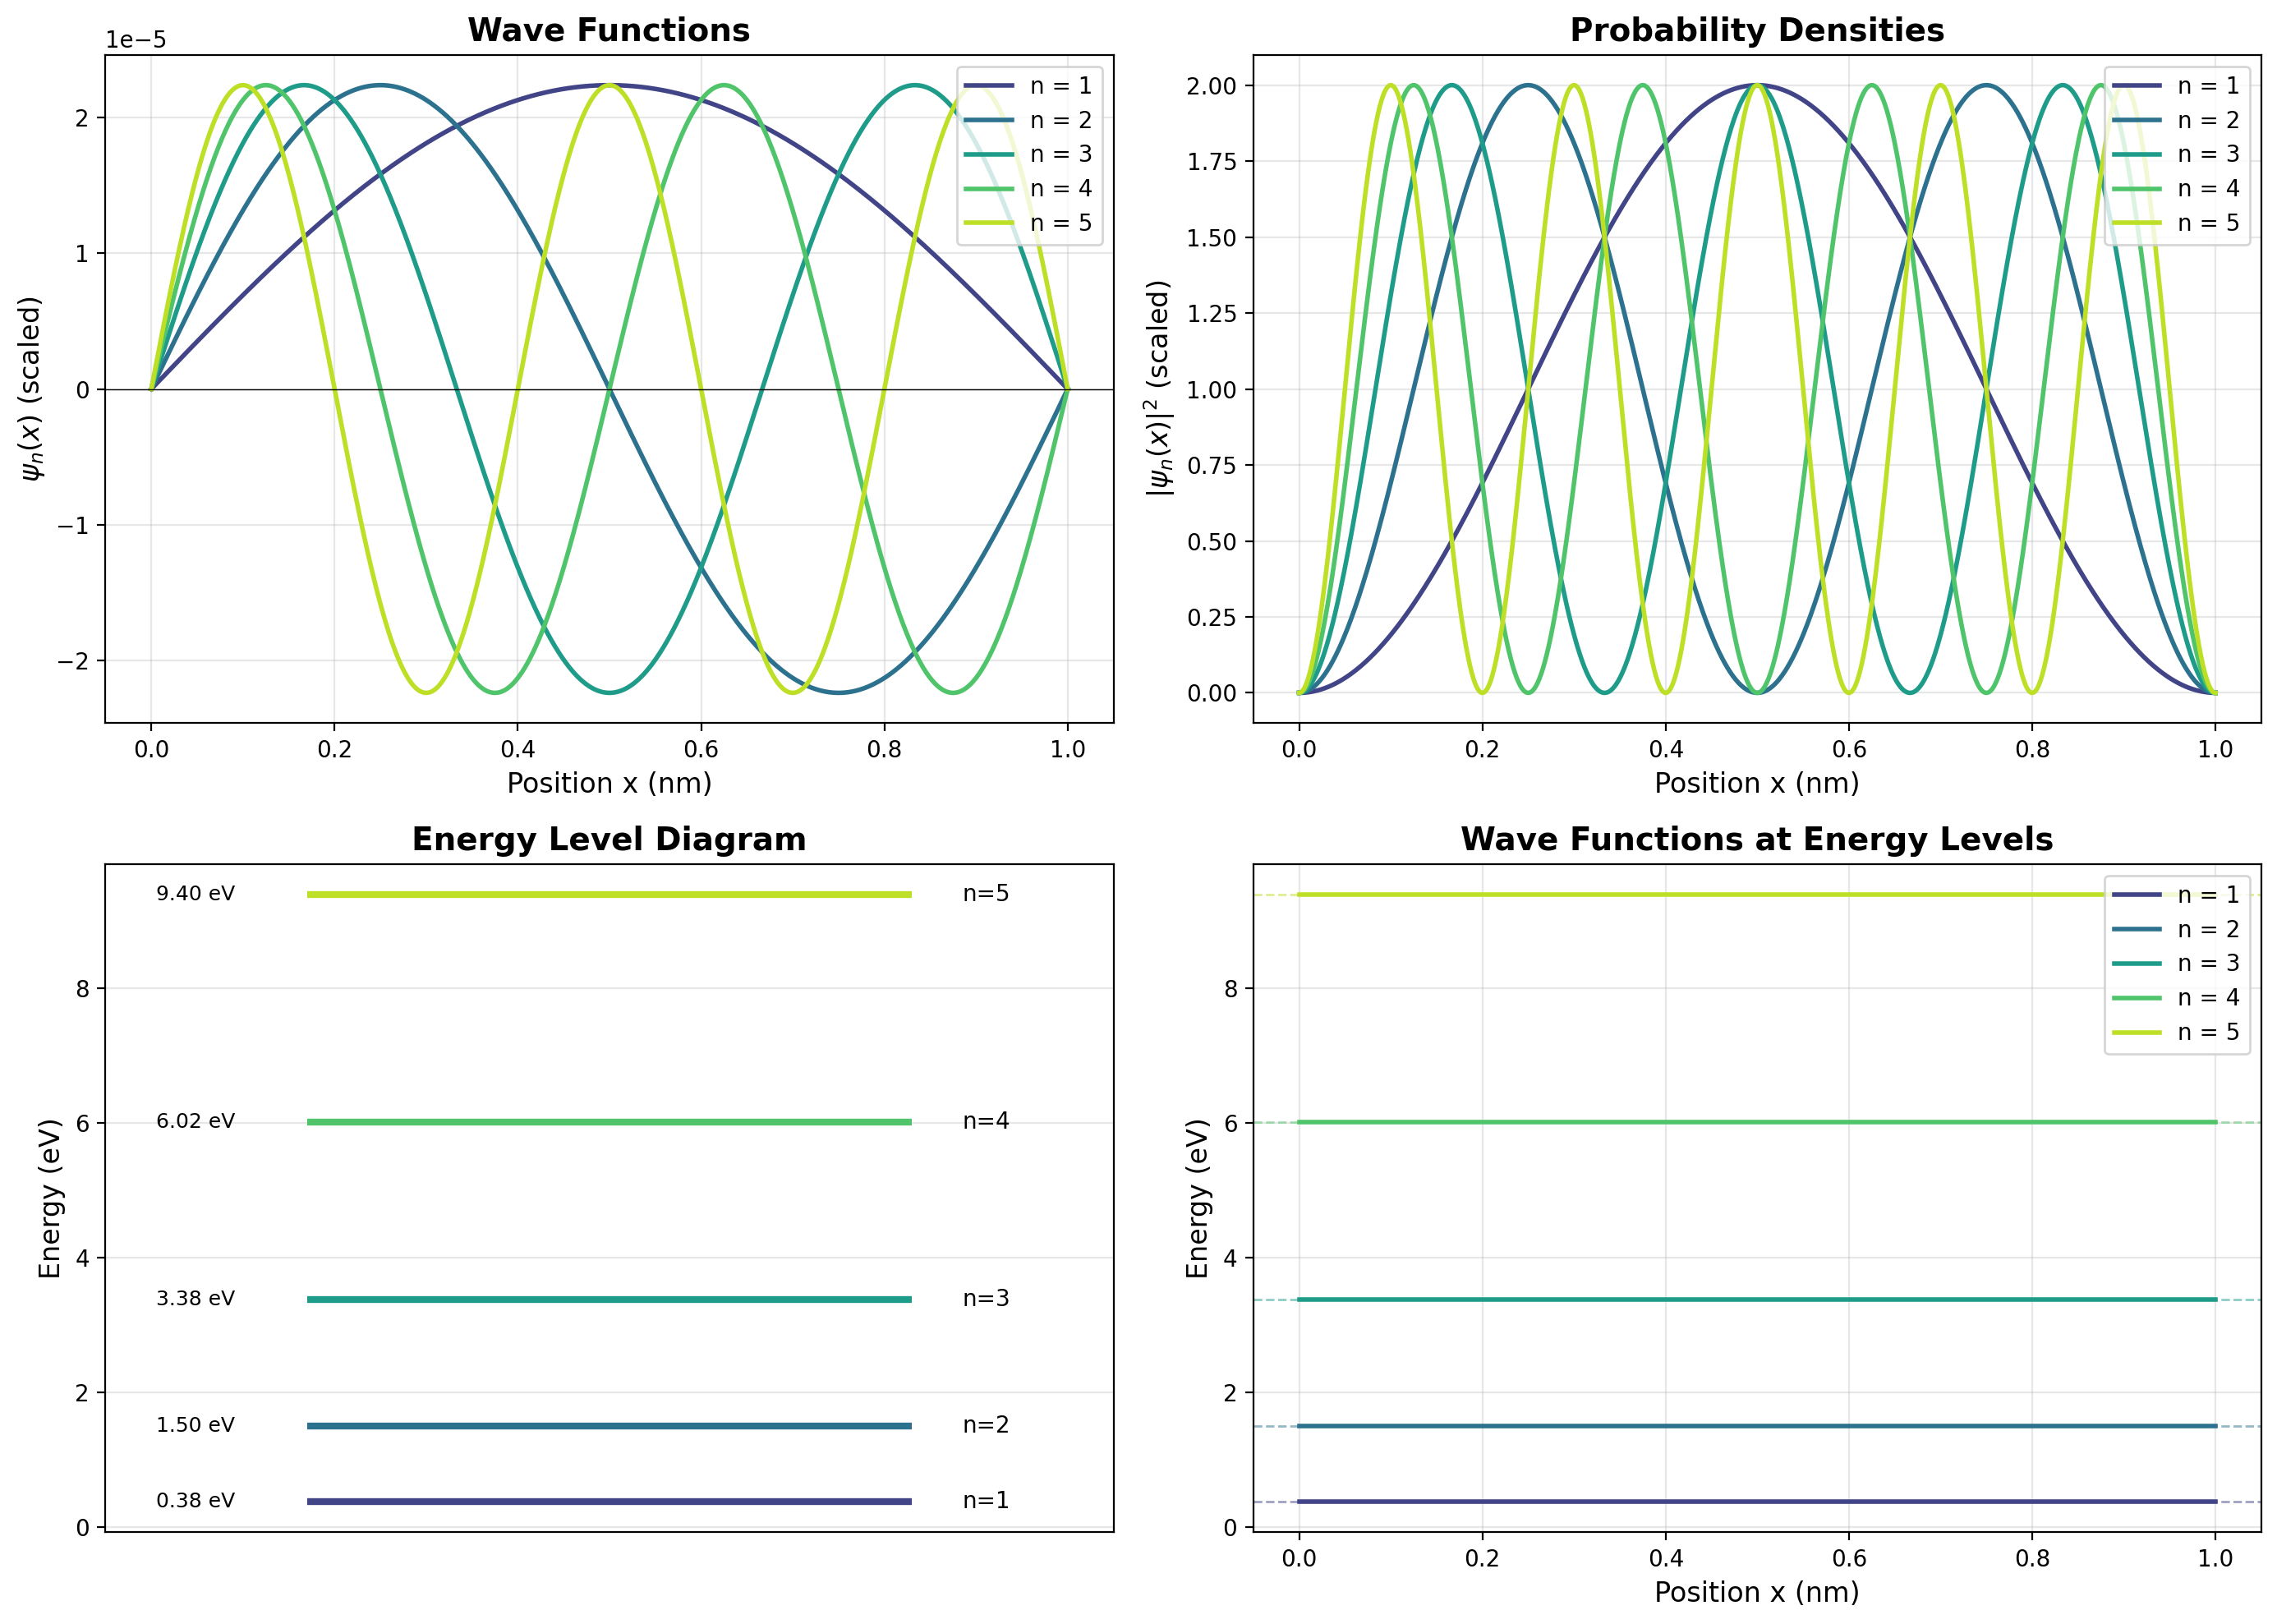


Figure saved as 'plot.png'


In [2]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 10))

# Convert x to nanometers for plotting
x_nm = x * 1e9

# Color scheme
colors = plt.cm.viridis(np.linspace(0.2, 0.9, n_states))

# Plot 1: Wave Functions
ax1 = fig.add_subplot(2, 2, 1)
for n in range(1, n_states + 1):
    psi = wave_function(x, n, L) * 1e-9/2  # Scale for visibility
    ax1.plot(x_nm, psi, color=colors[n-1], linewidth=2, label=f'n = {n}')
ax1.set_xlabel('Position x (nm)', fontsize=12)
ax1.set_ylabel(r'$\psi_n(x)$ (scaled)', fontsize=12)
ax1.set_title('Wave Functions', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

# Plot 2: Probability Densities
ax2 = fig.add_subplot(2, 2, 2)
for n in range(1, n_states + 1):
    prob = probability_density(x, n, L) * 1e-9  # Scale for visibility
    ax2.plot(x_nm, prob, color=colors[n-1], linewidth=2, label=f'n = {n}')
ax2.set_xlabel('Position x (nm)', fontsize=12)
ax2.set_ylabel(r'$|\psi_n(x)|^2$ (scaled)', fontsize=12)
ax2.set_title('Probability Densities', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Plot 3: Energy Level Diagram
ax3 = fig.add_subplot(2, 2, 3)
for n in range(1, n_states + 1):
    E = energy_level(n, L) / constants.eV
    ax3.hlines(E, 0.2, 0.8, colors=colors[n-1], linewidth=3)
    ax3.text(0.85, E, f'n={n}', va='center', fontsize=10)
    ax3.text(0.05, E, f'{E:.2f} eV', va='center', fontsize=9)
ax3.set_xlim(0, 1)
ax3.set_ylabel('Energy (eV)', fontsize=12)
ax3.set_title('Energy Level Diagram', fontsize=14, fontweight='bold')
ax3.set_xticks([])
ax3.grid(True, axis='y', alpha=0.3)

# Plot 4: Wave functions with energy offsets (quantum picture)
ax4 = fig.add_subplot(2, 2, 4)
for n in range(1, n_states + 1):
    E = energy_level(n, L) / constants.eV
    psi = wave_function(x, n, L) * 1e-9/2 * 0.3  # Scale for visibility
    
    # Plot energy level
    ax4.axhline(y=E, color=colors[n-1], linestyle='--', alpha=0.5, linewidth=1)
    
    # Plot wave function offset by energy
    ax4.plot(x_nm, psi + E, color=colors[n-1], linewidth=2, label=f'n = {n}')
    ax4.fill_between(x_nm, E, psi + E, color=colors[n-1], alpha=0.2)

ax4.set_xlabel('Position x (nm)', fontsize=12)
ax4.set_ylabel('Energy (eV)', fontsize=12)
ax4.set_title('Wave Functions at Energy Levels', fontsize=14, fontweight='bold')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()

# Save the figure
plt.savefig('particle_in_a_box_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved as 'plot.png'")

In [3]:
# Verify orthonormality of wave functions
print("Verification of Orthonormality:")
print("=" * 40)
print("\n⟨ψ_m | ψ_n⟩ = δ_mn\n")

# Create orthonormality matrix
ortho_matrix = np.zeros((n_states, n_states))

for m in range(1, n_states + 1):
    for n in range(1, n_states + 1):
        psi_m = wave_function(x, m, L)
        psi_n = wave_function(x, n, L)
        # Numerical integration using trapezoidal rule
        integral = np.trapz(psi_m * psi_n, x)
        ortho_matrix[m-1, n-1] = integral

print("Overlap Matrix ⟨ψ_m | ψ_n⟩:")
print(np.round(ortho_matrix, 6))

# Check expectation values
print("\n" + "=" * 40)
print("Expectation Values:")
print("=" * 40)

for n in range(1, 4):
    psi = wave_function(x, n, L)
    prob = np.abs(psi)**2
    
    # ⟨x⟩ - average position
    x_avg = np.trapz(x * prob, x)
    
    # ⟨x²⟩ - average of x squared
    x2_avg = np.trapz(x**2 * prob, x)
    
    # Δx - position uncertainty
    delta_x = np.sqrt(x2_avg - x_avg**2)
    
    print(f"\nn = {n}:")
    print(f"  ⟨x⟩ = {x_avg*1e9:.4f} nm (expected: {L*1e9/2:.4f} nm)")
    print(f"  Δx = {delta_x*1e9:.4f} nm")
    print(f"  Δx/L = {delta_x/L:.4f}")

Verification of Orthonormality:

⟨ψ_m | ψ_n⟩ = δ_mn

Overlap Matrix ⟨ψ_m | ψ_n⟩:
[[ 1.  0.  0.  0. -0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [-0.  0.  0.  0.  1.]]

Expectation Values:

n = 1:
  ⟨x⟩ = 0.5000 nm (expected: 0.5000 nm)
  Δx = 0.1808 nm
  Δx/L = 0.1808

n = 2:
  ⟨x⟩ = 0.5000 nm (expected: 0.5000 nm)
  Δx = 0.2658 nm
  Δx/L = 0.2658

n = 3:
  ⟨x⟩ = 0.5000 nm (expected: 0.5000 nm)
  Δx = 0.2788 nm
  Δx/L = 0.2788


/tmp/ipykernel_158992/1763627836.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(psi_m * psi_n, x)
/tmp/ipykernel_158992/1763627836.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  x_avg = np.trapz(x * prob, x)
/tmp/ipykernel_158992/1763627836.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  x2_avg = np.trapz(x**2 * prob, x)


## Conclusions

This notebook demonstrates the fundamental quantum mechanical properties of a particle confined in an infinite square well:

1. **Energy Quantization**: The energy levels scale as $E_n \propto n^2$, with the ground state energy being non-zero (zero-point energy).

2. **Wave Function Characteristics**: Higher quantum states exhibit more nodes and oscillations, reflecting higher kinetic energy.

3. **Probability Distributions**: The probability density $|\psi_n|^2$ shows that the particle is more likely to be found at certain positions depending on its quantum state.

4. **Orthonormality**: The eigenfunctions form a complete orthonormal basis, satisfying $\langle\psi_m|\psi_n\rangle = \delta_{mn}$.

5. **Symmetry**: The expectation value of position $\langle x \rangle = L/2$ for all states due to the symmetric potential.

This idealized model serves as a foundation for understanding more complex quantum systems, including quantum dots, molecular orbitals, and solid-state physics.